In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyupbit
from sklearn import preprocessing

# 이더리움

In [2]:
ticker = 'KRW-ETH'
interval = 'day'
to = '2022-01-01'
count = 365
ethereum = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))

ethereum.reset_index(inplace=True)
ethereum = ethereum.rename(columns={'index':'date'})

ethereum= ethereum.drop_duplicates(['date'])
ethereum

,date,open,high,low,close,volume,value
0,2021-01-01 09:00:00,815100.0,826600.0,793600.0,803000.0,9.474003e+04,7.704969e+10
1,2021-01-02 09:00:00,802900.0,865400.0,789000.0,858700.0,2.313476e+05,1.931445e+11
2,2021-01-03 09:00:00,858700.0,1144000.0,855000.0,1113500.0,7.478431e+05,7.474054e+11
3,2021-01-04 09:00:00,1114000.0,1335500.0,1035000.0,1189000.0,1.434144e+06,1.662490e+12
4,2021-01-05 09:00:00,1190000.0,1293500.0,1120500.0,1236000.0,7.358599e+05,8.827894e+11
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000.0,4957000.0,4864000.0,4896000.0,2.661636e+04,1.307935e+11
361,2021-12-28 09:00:00,4896000.0,4899000.0,4630000.0,4650000.0,4.759861e+04,2.266827e+11
362,2021-12-29 09:00:00,4650000.0,4682000.0,4423000.0,4456000.0,4.510187e+04,2.066389e+11
363,2021-12-30 09:00:00,4457000.0,4578000.0,4402000.0,4506000.0,3.570867e+04,1.605427e+11


In [3]:
ethereum = ethereum.astype({'open': int, 'high': int, 'low': int, 'close':int})
ethereum

,date,open,high,low,close,volume,value
0,2021-01-01 09:00:00,815100,826600,793600,803000,9.474003e+04,7.704969e+10
1,2021-01-02 09:00:00,802900,865400,789000,858700,2.313476e+05,1.931445e+11
2,2021-01-03 09:00:00,858700,1144000,855000,1113500,7.478431e+05,7.474054e+11
3,2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1.434144e+06,1.662490e+12
4,2021-01-05 09:00:00,1190000,1293500,1120500,1236000,7.358599e+05,8.827894e+11
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000,4957000,4864000,4896000,2.661636e+04,1.307935e+11
361,2021-12-28 09:00:00,4896000,4899000,4630000,4650000,4.759861e+04,2.266827e+11
362,2021-12-29 09:00:00,4650000,4682000,4423000,4456000,4.510187e+04,2.066389e+11
363,2021-12-30 09:00:00,4457000,4578000,4402000,4506000,3.570867e+04,1.605427e+11


In [4]:
#ethereum.to_csv("ethereum_210101_211231.csv")

# 환율

In [37]:
exchange_rate = pd.read_csv('data/최종/환율_200102_211230.csv', names=['day', 'won'], encoding='cp949')
exchange_rate

,day,won
0,2021-01-01,"1,088.00"
1,2021-01-02,"1,088.00"
2,2021-01-03,"1,088.00"
3,2021-01-04,"1,088.00"
4,2021-01-05,"1,083.10"
...,...,...
360,2021-12-27,"1,186.40"
361,2021-12-28,"1,186.20"
362,2021-12-29,"1,186.70"
363,2021-12-30,"1,186.60"


In [38]:
def remove_comma(x):
    return x.replace(',', '')

exchange_rate['won'] = exchange_rate['won'].apply(remove_comma)
exchange_rate = exchange_rate.astype({'won': float})
exchange_rate

,day,won
0,2021-01-01,1088.0
1,2021-01-02,1088.0
2,2021-01-03,1088.0
3,2021-01-04,1088.0
4,2021-01-05,1083.1
...,...,...
360,2021-12-27,1186.4
361,2021-12-28,1186.2
362,2021-12-29,1186.7
363,2021-12-30,1186.6


In [39]:
ethereum_exchange_rate = pd.concat([ethereum, exchange_rate], axis=1)
ethereum_exchange_rate.drop(ethereum_exchange_rate.columns[[7]], axis=1, inplace=True)
ethereum_exchange_rate

,date,open,high,low,close,volume,value,won
0,2021-01-01 09:00:00,815100,826600,793600,803000,9.474003e+04,7.704969e+10,1088.0
1,2021-01-02 09:00:00,802900,865400,789000,858700,2.313476e+05,1.931445e+11,1088.0
2,2021-01-03 09:00:00,858700,1144000,855000,1113500,7.478431e+05,7.474054e+11,1088.0
3,2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1.434144e+06,1.662490e+12,1088.0
4,2021-01-05 09:00:00,1190000,1293500,1120500,1236000,7.358599e+05,8.827894e+11,1083.1
...,...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000,4957000,4864000,4896000,2.661636e+04,1.307935e+11,1186.4
361,2021-12-28 09:00:00,4896000,4899000,4630000,4650000,4.759861e+04,2.266827e+11,1186.2
362,2021-12-29 09:00:00,4650000,4682000,4423000,4456000,4.510187e+04,2.066389e+11,1186.7
363,2021-12-30 09:00:00,4457000,4578000,4402000,4506000,3.570867e+04,1.605427e+11,1186.6


In [40]:
ethereum_exchange_rate.drop(ethereum_exchange_rate.columns[[5,6]], axis=1, inplace=True)
ethereum_exchange_rate

,date,open,high,low,close,won
0,2021-01-01 09:00:00,815100,826600,793600,803000,1088.0
1,2021-01-02 09:00:00,802900,865400,789000,858700,1088.0
2,2021-01-03 09:00:00,858700,1144000,855000,1113500,1088.0
3,2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1088.0
4,2021-01-05 09:00:00,1190000,1293500,1120500,1236000,1083.1
...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000,4957000,4864000,4896000,1186.4
361,2021-12-28 09:00:00,4896000,4899000,4630000,4650000,1186.2
362,2021-12-29 09:00:00,4650000,4682000,4423000,4456000,1186.7
363,2021-12-30 09:00:00,4457000,4578000,4402000,4506000,1186.6


In [8]:
#ethereum_exchange_rate.to_csv("ethereum_exchange_rate.csv")

C:\Users\hmin0\AppData\Local\Temp/ipykernel_14308/878891823.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


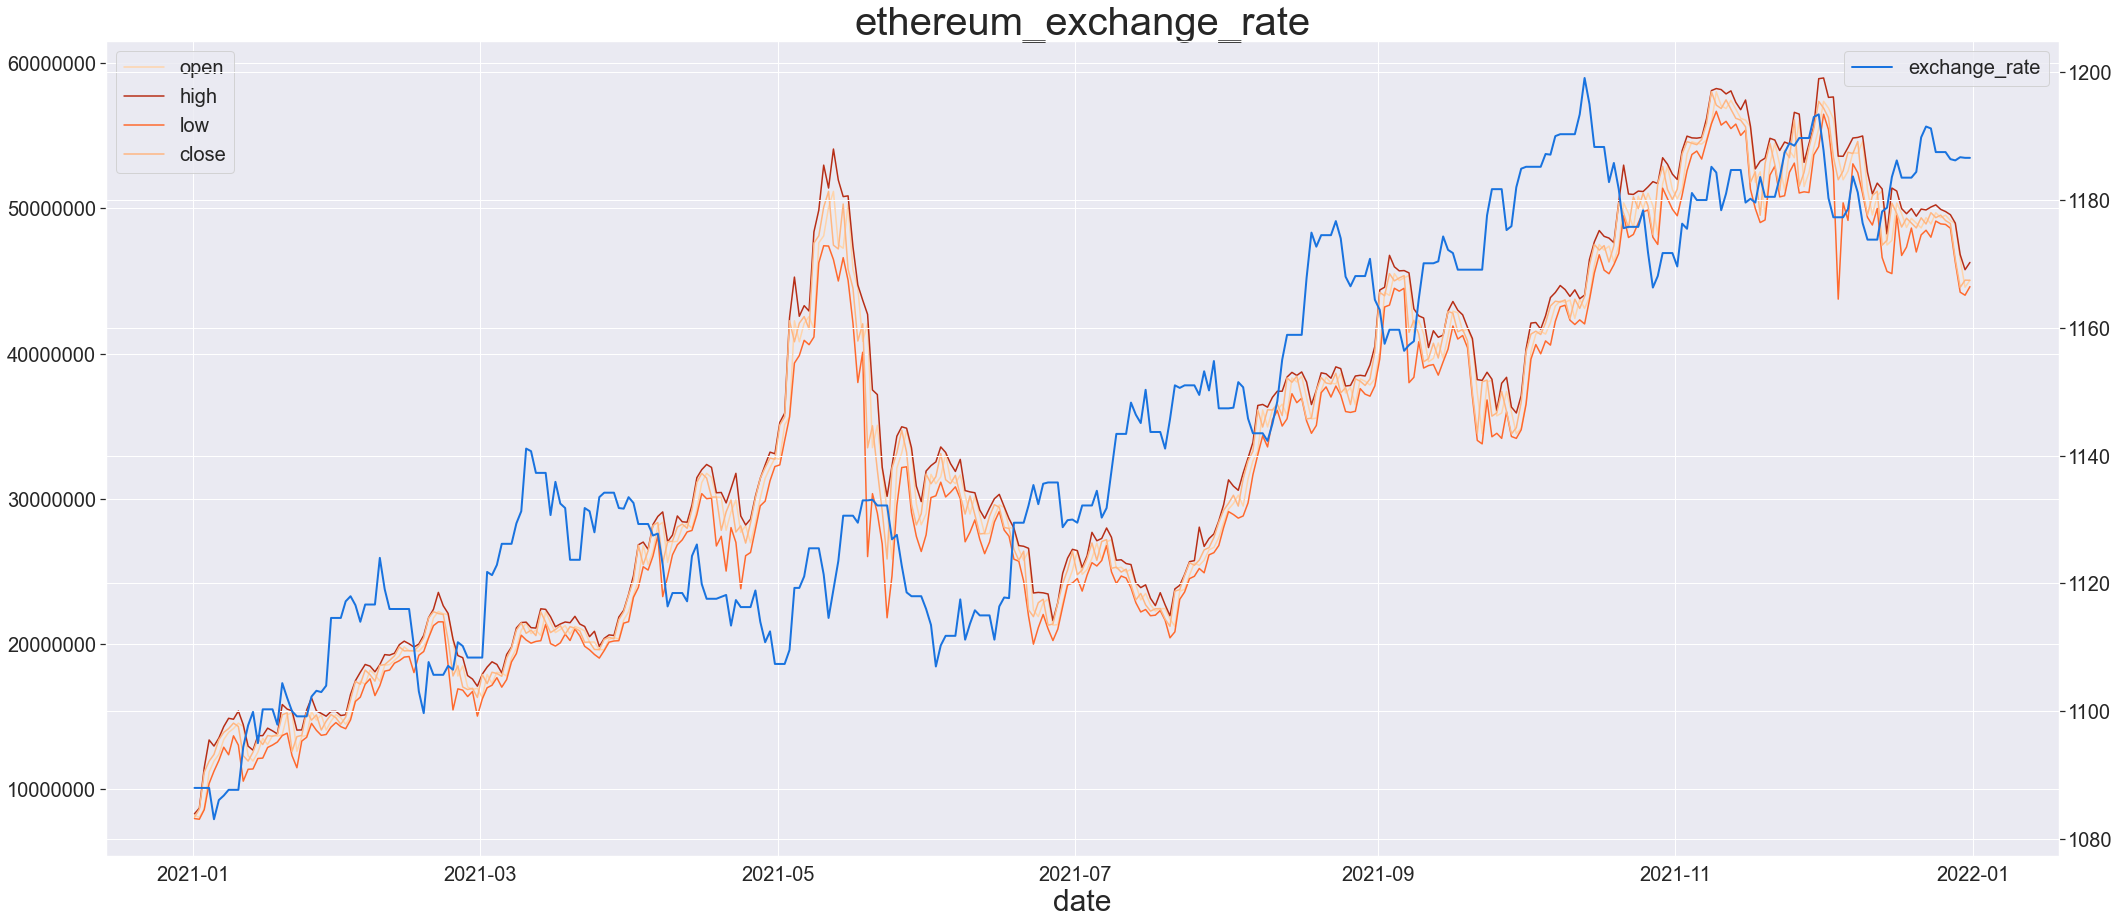

In [63]:
x = eth_er_ir.date
y1 = eth_er_ir.open
y2 = eth_er_ir.high
y3 = eth_er_ir.low
y4 = eth_er_ir.close
y5= eth_er_ir.won

plt.rcParams['figure.figsize'] = (35, 15)
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('ethereum_exchange_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 10000000, 20000000,30000000, 40000000, 50000000, 60000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='exchange_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2_yticks= [i for i in range(0.5, 1.0)]
#ax2.set_ylim(["", 0.50, 0.75, 1.00]) #수정필요
plt.show()

# 금리

In [49]:
interest_rate=pd.read_csv('data/최종/기준금리_200102_211230.csv', names=['day', 'percent'], encoding='cp949')
interest_rate=interest_rate.drop(0)
interest_rate.reset_index(drop=True, inplace=True)
interest_rate

,day,percent
0,2021/01/01,0.50
1,2021/01/02,0.50
2,2021/01/03,0.50
3,2021/01/04,0.50
4,2021/01/05,0.50
...,...,...
360,2021/12/27,1.00
361,2021/12/28,1.00
362,2021/12/29,1.00
363,2021/12/30,1.00


In [50]:
ethereum_interest_rate= pd.concat([ethereum, interest_rate], axis=1)
ethereum_interest_rate.drop(ethereum_interest_rate.columns[[7]], axis=1, inplace=True)

ethereum_interest_rate

,date,open,high,low,close,volume,value,percent
0,2021-01-01 09:00:00,815100,826600,793600,803000,9.474003e+04,7.704969e+10,0.50
1,2021-01-02 09:00:00,802900,865400,789000,858700,2.313476e+05,1.931445e+11,0.50
2,2021-01-03 09:00:00,858700,1144000,855000,1113500,7.478431e+05,7.474054e+11,0.50
3,2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1.434144e+06,1.662490e+12,0.50
4,2021-01-05 09:00:00,1190000,1293500,1120500,1236000,7.358599e+05,8.827894e+11,0.50
...,...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000,4957000,4864000,4896000,2.661636e+04,1.307935e+11,1.00
361,2021-12-28 09:00:00,4896000,4899000,4630000,4650000,4.759861e+04,2.266827e+11,1.00
362,2021-12-29 09:00:00,4650000,4682000,4423000,4456000,4.510187e+04,2.066389e+11,1.00
363,2021-12-30 09:00:00,4457000,4578000,4402000,4506000,3.570867e+04,1.605427e+11,1.00


In [12]:
#ethereum_interest_rate.to_csv("ethereum_interest_rate.csv")

In [51]:
ethereum_interest_rate.drop(ethereum_interest_rate.columns[[1,2,3,5,6]], axis=1, inplace=True)
ethereum_interest_rate

,date,close,percent
0,2021-01-01 09:00:00,803000,0.50
1,2021-01-02 09:00:00,858700,0.50
2,2021-01-03 09:00:00,1113500,0.50
3,2021-01-04 09:00:00,1189000,0.50
4,2021-01-05 09:00:00,1236000,0.50
...,...,...,...
360,2021-12-27 09:00:00,4896000,1.00
361,2021-12-28 09:00:00,4650000,1.00
362,2021-12-29 09:00:00,4456000,1.00
363,2021-12-30 09:00:00,4506000,1.00


In [52]:
ethereum_interest_rate.drop(ethereum_interest_rate.columns[[1]], axis=1, inplace=True)
ethereum_interest_rate

,date,percent
0,2021-01-01 09:00:00,0.50
1,2021-01-02 09:00:00,0.50
2,2021-01-03 09:00:00,0.50
3,2021-01-04 09:00:00,0.50
4,2021-01-05 09:00:00,0.50
...,...,...
360,2021-12-27 09:00:00,1.00
361,2021-12-28 09:00:00,1.00
362,2021-12-29 09:00:00,1.00
363,2021-12-30 09:00:00,1.00


In [54]:
ethereum_interest_rate.set_index("date", drop=True, inplace=True)
ethereum_interest_rate

,percent
date,
2021-01-01 09:00:00,0.50
2021-01-02 09:00:00,0.50
2021-01-03 09:00:00,0.50
2021-01-04 09:00:00,0.50
2021-01-05 09:00:00,0.50
...,...
2021-12-27 09:00:00,1.00
2021-12-28 09:00:00,1.00
2021-12-29 09:00:00,1.00


In [56]:
ethereum_exchange_rate.set_index("date", drop=True, inplace=True)
ethereum_exchange_rate

,open,high,low,close,won
date,,,,,
2021-01-01 09:00:00,815100,826600,793600,803000,1088.0
2021-01-02 09:00:00,802900,865400,789000,858700,1088.0
2021-01-03 09:00:00,858700,1144000,855000,1113500,1088.0
2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1088.0
2021-01-05 09:00:00,1190000,1293500,1120500,1236000,1083.1
...,...,...,...,...,...
2021-12-27 09:00:00,4917000,4957000,4864000,4896000,1186.4
2021-12-28 09:00:00,4896000,4899000,4630000,4650000,1186.2
2021-12-29 09:00:00,4650000,4682000,4423000,4456000,1186.7


In [57]:
eth_er_ir = pd.concat([ethereum_exchange_rate, ethereum_interest_rate], axis=1)
eth_er_ir

,open,high,low,close,won,percent
date,,,,,,
2021-01-01 09:00:00,815100,826600,793600,803000,1088.0,0.50
2021-01-02 09:00:00,802900,865400,789000,858700,1088.0,0.50
2021-01-03 09:00:00,858700,1144000,855000,1113500,1088.0,0.50
2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1088.0,0.50
2021-01-05 09:00:00,1190000,1293500,1120500,1236000,1083.1,0.50
...,...,...,...,...,...,...
2021-12-27 09:00:00,4917000,4957000,4864000,4896000,1186.4,1.00
2021-12-28 09:00:00,4896000,4899000,4630000,4650000,1186.2,1.00
2021-12-29 09:00:00,4650000,4682000,4423000,4456000,1186.7,1.00


In [60]:
eth_er_ir.reset_index(level=0, inplace=True)
eth_er_ir

,date,open,high,low,close,won,percent
0,2021-01-01 09:00:00,815100,826600,793600,803000,1088.0,0.50
1,2021-01-02 09:00:00,802900,865400,789000,858700,1088.0,0.50
2,2021-01-03 09:00:00,858700,1144000,855000,1113500,1088.0,0.50
3,2021-01-04 09:00:00,1114000,1335500,1035000,1189000,1088.0,0.50
4,2021-01-05 09:00:00,1190000,1293500,1120500,1236000,1083.1,0.50
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000,4957000,4864000,4896000,1186.4,1.00
361,2021-12-28 09:00:00,4896000,4899000,4630000,4650000,1186.2,1.00
362,2021-12-29 09:00:00,4650000,4682000,4423000,4456000,1186.7,1.00
363,2021-12-30 09:00:00,4457000,4578000,4402000,4506000,1186.6,1.00


In [61]:
#eth_er_ir.to_csv("data/final/eth_er_ir.csv")

C:\Users\hmin0\AppData\Local\Temp/ipykernel_14308/1012419311.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


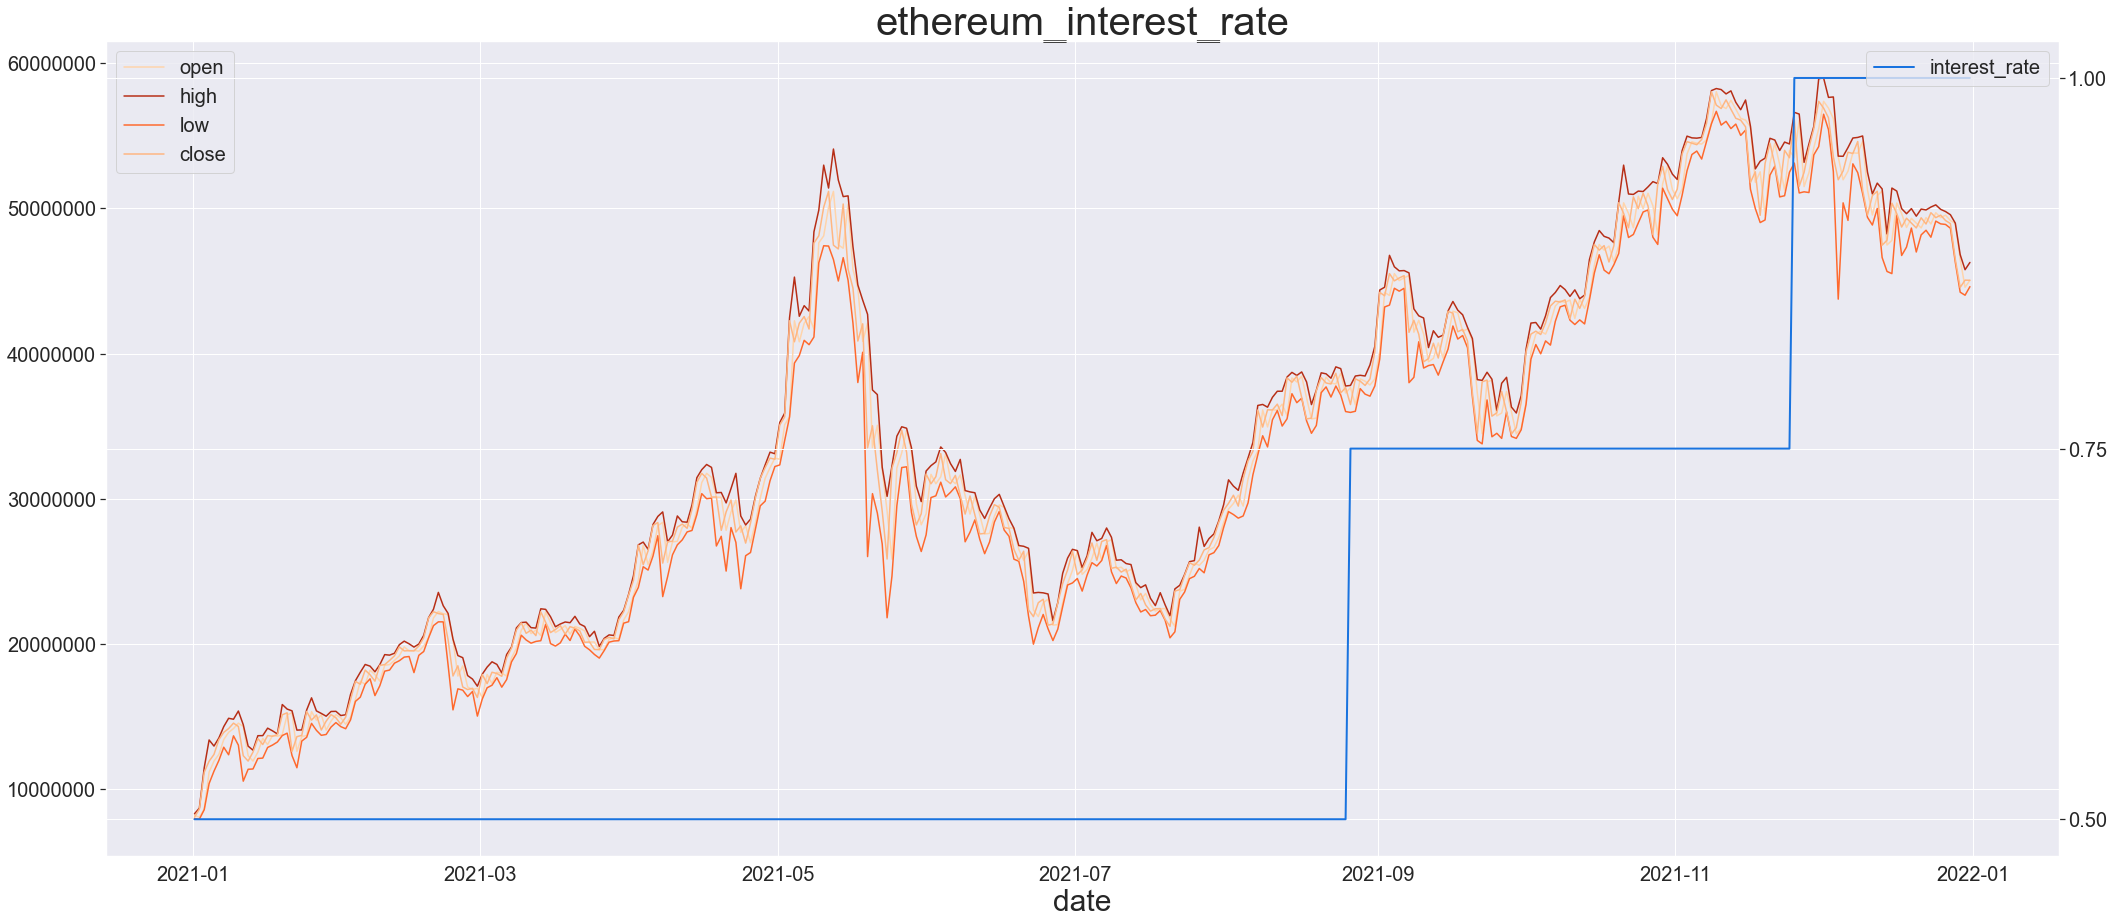

In [62]:
x = eth_er_ir.date
y1 = eth_er_ir.open
y2 = eth_er_ir.high
y3 = eth_er_ir.low
y4 = eth_er_ir.close
y5= eth_er_ir.percent

plt.rcParams['figure.figsize'] = (35, 15)
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('ethereum_interest_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 10000000, 20000000,30000000, 40000000, 50000000, 60000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='interest_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2_yticks= [i for i in range(0.5, 1.0)]
#ax2.set_ylim(["", 0.50, 0.75, 1.00]) #수정필요
plt.show()

# 일일손익률

In [14]:
eth= ethereum[["date", "close"]]
eth.set_index("date", drop=True, inplace=True)
eth.head()

,close
date,
2021-01-01 09:00:00,803000
2021-01-02 09:00:00,858700
2021-01-03 09:00:00,1113500
2021-01-04 09:00:00,1189000
2021-01-05 09:00:00,1236000


In [15]:
eth["dr"] = eth["close"].pct_change()
#eth["dr100"] = eth["dr"] * 100
eth

C:\Users\hmin0\AppData\Local\Temp/ipykernel_14308/297957276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth["dr"] = eth["close"].pct_change()


,close,dr
date,,
2021-01-01 09:00:00,803000,NaN
2021-01-02 09:00:00,858700,0.069365
2021-01-03 09:00:00,1113500,0.296728
2021-01-04 09:00:00,1189000,0.067804
2021-01-05 09:00:00,1236000,0.039529
...,...,...
2021-12-27 09:00:00,4896000,-0.004271
2021-12-28 09:00:00,4650000,-0.050245
2021-12-29 09:00:00,4456000,-0.041720


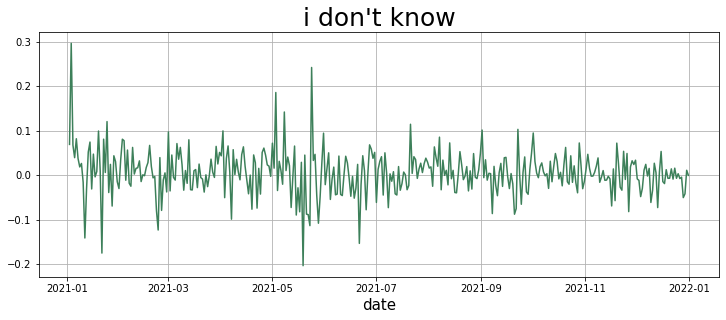

In [16]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(eth.index, eth["dr"], '#3d805a')
plt.title("i don't know", fontsize=25)
plt.xlabel("date", fontsize=15)
plt.grid(True)
#plt.xticks(["2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07",
          # "2021-08", "2021-09", "2021-10", "2021-11", "2021-12"])
#plt.legend(["daily_return"], prop={'size': 10})
plt.show()

# 일일 누적 손익률

In [17]:
eth["dcr"] = (eth["dr"]+1).cumprod()-1
#eth["dcsr100"] = eth["dcsr"] * 100
eth

C:\Users\hmin0\AppData\Local\Temp/ipykernel_14308/418202100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth["dcr"] = (eth["dr"]+1).cumprod()-1


,close,dr,dcr
date,,,
2021-01-01 09:00:00,803000,NaN,NaN
2021-01-02 09:00:00,858700,0.069365,0.069365
2021-01-03 09:00:00,1113500,0.296728,0.386675
2021-01-04 09:00:00,1189000,0.067804,0.480697
2021-01-05 09:00:00,1236000,0.039529,0.539228
...,...,...,...
2021-12-27 09:00:00,4896000,-0.004271,5.097136
2021-12-28 09:00:00,4650000,-0.050245,4.790785
2021-12-29 09:00:00,4456000,-0.041720,4.549191


In [18]:
#eth.to_csv("eth.csv")

In [19]:
5805000 / 803000

7.229140722291407

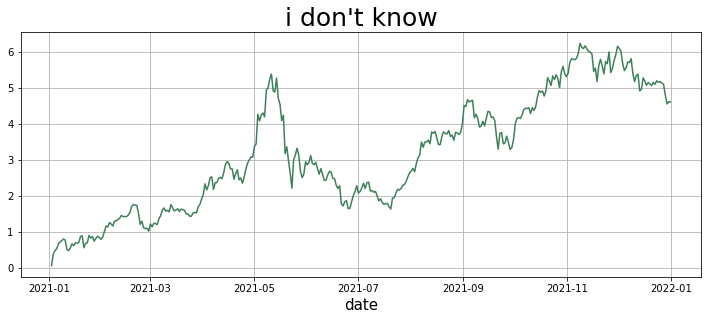

In [20]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(eth.index, eth["dcr"], '#3d805a')
plt.title("i don't know", fontsize=25)
plt.xlabel("date", fontsize=15)
plt.grid(True)
plt.show()

In [21]:
#min_max_sacaler = preprocessing.MinMaxScaler(feature_range=(0,100))
#scaled = min_max_sacaler.fit_transform(eth)
#eth_scale = pd.DataFrame(scaled, columns=eth.columns)
#eth_scale = eth_scale.set_index(eth.index)
#eth_scale

## 여러지수 비교

In [22]:
total_rate = pd.read_csv("data/최종/total_rate_2021.csv", index_col=0)
total_rate

,date,KOSPI,NASDAQ,SP500,irate,erate
0,2021-01-01,2873.47,12698.45,3700.65,0.5,1088.0
1,2021-01-02,2873.47,12698.45,3700.65,0.5,1088.0
2,2021-01-03,2873.47,12698.45,3700.65,0.5,1088.0
3,2021-01-04,2944.45,12698.45,3700.65,0.5,1088.0
4,2021-01-05,2990.57,12818.96,3726.86,0.5,1083.1
...,...,...,...,...,...,...
360,2021-12-27,2999.55,15871.26,4791.19,1.0,1186.4
361,2021-12-28,3020.24,15781.72,4786.35,1.0,1186.2
362,2021-12-29,2993.29,15766.22,4793.06,1.0,1186.7
363,2021-12-30,2977.65,15741.56,4778.73,1.0,1186.6


In [23]:
eth_sample = pd.read_csv("data/최종/ethereum_210101_211231.csv")
eth_sample = eth_sample.drop(eth_sample.columns[0], axis=1)
eth_sample= eth_sample.set_index("date")
eth_sample = eth_sample.drop(["open","high","low", "volume", "value"], axis=1)
eth_sample.index = eth_sample.index.str.replace(" 09:00:00", "")
eth_sample.columns = ['eth']
eth_sample.reset_index(level=0, inplace=True)
eth_sample.drop(["date"], axis=1, inplace=True)
eth_sample

,eth
0,803000.0
1,858700.0
2,1113500.0
3,1189000.0
4,1236000.0
...,...
360,4896000.0
361,4650000.0
362,4456000.0
363,4506000.0


In [24]:
total_rate_eth = pd.concat([total_rate, eth_sample], axis=1)
total_rate_eth

,date,KOSPI,NASDAQ,SP500,irate,erate,eth
0,2021-01-01,2873.47,12698.45,3700.65,0.5,1088.0,803000.0
1,2021-01-02,2873.47,12698.45,3700.65,0.5,1088.0,858700.0
2,2021-01-03,2873.47,12698.45,3700.65,0.5,1088.0,1113500.0
3,2021-01-04,2944.45,12698.45,3700.65,0.5,1088.0,1189000.0
4,2021-01-05,2990.57,12818.96,3726.86,0.5,1083.1,1236000.0
...,...,...,...,...,...,...,...
360,2021-12-27,2999.55,15871.26,4791.19,1.0,1186.4,4896000.0
361,2021-12-28,3020.24,15781.72,4786.35,1.0,1186.2,4650000.0
362,2021-12-29,2993.29,15766.22,4793.06,1.0,1186.7,4456000.0
363,2021-12-30,2977.65,15741.56,4778.73,1.0,1186.6,4506000.0


In [25]:
total_rate_eth = total_rate_eth.set_index('date')
total_rate_eth

,KOSPI,NASDAQ,SP500,irate,erate,eth
date,,,,,,
2021-01-01,2873.47,12698.45,3700.65,0.5,1088.0,803000.0
2021-01-02,2873.47,12698.45,3700.65,0.5,1088.0,858700.0
2021-01-03,2873.47,12698.45,3700.65,0.5,1088.0,1113500.0
2021-01-04,2944.45,12698.45,3700.65,0.5,1088.0,1189000.0
2021-01-05,2990.57,12818.96,3726.86,0.5,1083.1,1236000.0
...,...,...,...,...,...,...
2021-12-27,2999.55,15871.26,4791.19,1.0,1186.4,4896000.0
2021-12-28,3020.24,15781.72,4786.35,1.0,1186.2,4650000.0
2021-12-29,2993.29,15766.22,4793.06,1.0,1186.7,4456000.0


In [26]:
#total_rate_eth.to_csv("data/최종/total_rate_eth_2021.csv")

In [27]:
total_rate_eth = total_rate_eth.corr(method = 'pearson')

In [28]:
total_rate_eth

,KOSPI,NASDAQ,SP500,irate,erate,eth
KOSPI,1.000000,-0.184885,-0.127565,-0.577870,-0.423460,-0.367581
NASDAQ,-0.184885,1.000000,0.948548,0.744189,0.842722,0.798538
SP500,-0.127565,0.948548,1.000000,0.731786,0.865271,0.872940
irate,-0.577870,0.744189,0.731786,1.000000,0.801321,0.766551
erate,-0.423460,0.842722,0.865271,0.801321,1.000000,0.813693
eth,-0.367581,0.798538,0.872940,0.766551,0.813693,1.000000


In [64]:
#total_rate_eth.to_csv("data/final/total_eth.csv")

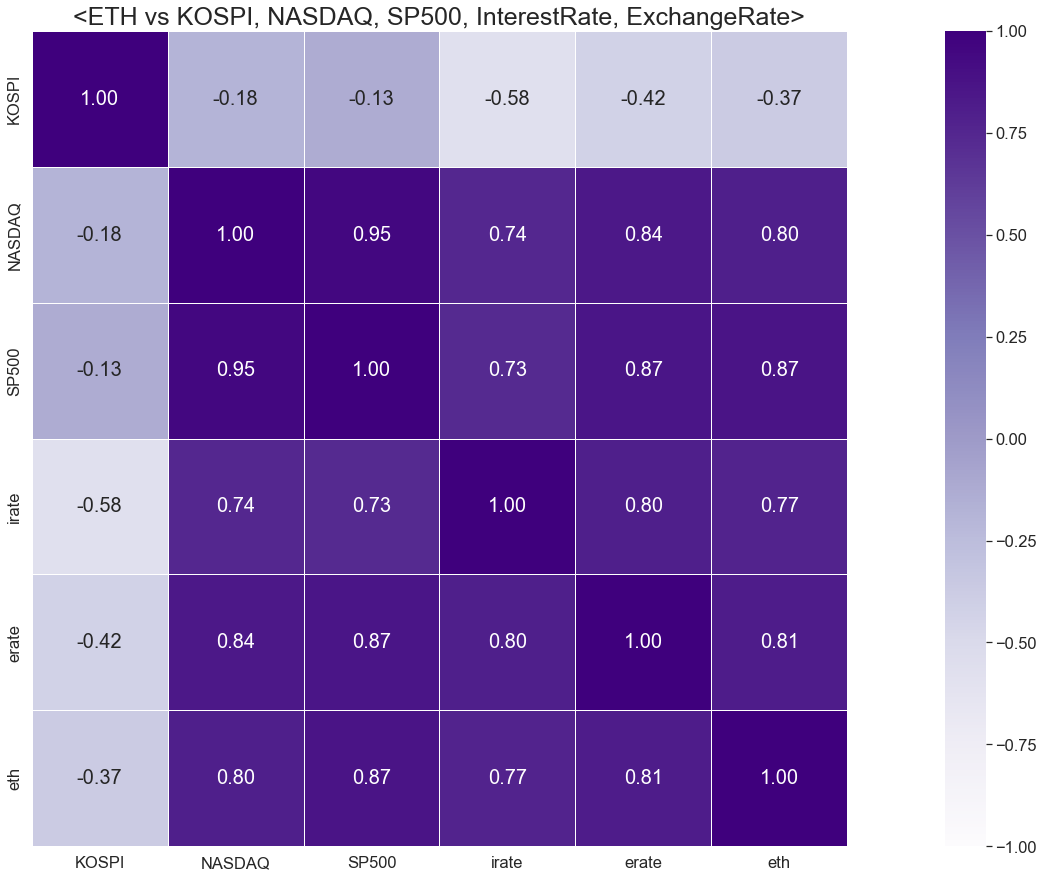

In [30]:
sns.heatmap(total_rate_eth,
            cmap = 'Purples', # Greys 색상으로 표시
            annot = True,   # 상관계수 값을 표시한다
            annot_kws={"size": 20},
            linewidths=.5,  # 경계면 구분하기
            fmt = '.2f', # 상관계수의 소수점 자리수  2자리로 지정
            #cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            square = True, # True로 설정 시 정사각형, False 설정 시 직사각형으로 설정
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.title("<ETH vs KOSPI, NASDAQ, SP500, InterestRate, ExchangeRate>", fontsize=25)
#sns.set(font_scale=1.5)
#plt.rc('axes', labelsize=20)
#plt.savefig("data/최종/eth_heatmap.png")
plt.show()